# Keras Tensorflow Sequential neural net regression
Reference : <br>
https://www.tensorflow.org/tutorials/keras/regression?hl=ja <br>
https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ja

### Import library and dataset

In [1]:
%matplotlib inline
%pylab inline  
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Neural net
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers
print('Tensorflow version', tf.__version__)

# Cross validation
from sklearn.model_selection import (KFold, ShuffleSplit)
from sklearn.metrics import mean_squared_error, r2_score

Populating the interactive namespace from numpy and matplotlib
Tensorflow version 2.3.1


In [2]:
# load dataset
df = pd.read_csv('glass.csv')
print(df.shape)
df.head()

(214, 11)


,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df_test = df.drop(df.columns[[0, 10]], axis=1)
print(df_test.shape)
df_test.head()

(214, 9)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [4]:
X = df_test.iloc[:, 1:]
y = df_test.iloc[:, :1]

In [5]:
print(X.shape)
X.head()

(214, 8)


,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
print(y.shape)
y.head()

(214, 1)


,RI
0,1.52101
1,1.51761
2,1.51618
3,1.51766
4,1.51742


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171, 8) (43, 8) (171, 1) (43, 1)


In [8]:
# Standardization
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
y_train_std = (y_train - y_train.mean(axis=0)) / y_train.std(axis=0)
X_test_std = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
y_test_std = (y_test - y_test.mean(axis=0)) / y_test.std(axis=0)

y_test_mean = np.squeeze(y_test.mean(axis=0))    # Use for inverse calculation
y_test_stdv = np.squeeze(y_test.std(axis=0))

print('y_test mean = ', y_test_mean, '   y_test_stdev = ', y_test_stdv)

y_test mean =  1.5181704651162786    y_test_stdev =  0.0033026244639596416


### Build model

In [9]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = [len(X.columns)]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam()

    model.compile(loss = 'mse',
                  optimizer = optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [10]:
model = build_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Test model
X_train_std_test = X_train_std[:5]
test_std = model.predict(X_train_std_test)
print('Test results for the first 5')
print(test_std * y_test_stdv + y_test_mean)

Test results for the first 5
[[1.5178982]
 [1.5183592]
 [1.5178905]
 [1.5178905]
 [1.5178189]]


In [13]:
%%time

# Fit model
history = model.fit(X_train_std, y_train_std, epochs = 1000, validation_split = 0.2, verbose = 0)

Wall time: 16.8 s


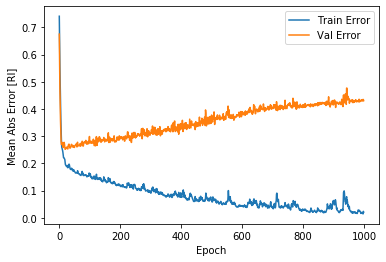

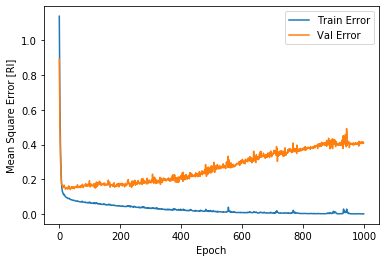

In [14]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [RI]')
    plt.legend(loc = 'best')

    plt.figure()
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [RI]')
    plt.legend(loc = 'best')
    plt.show()

plot_history(history)

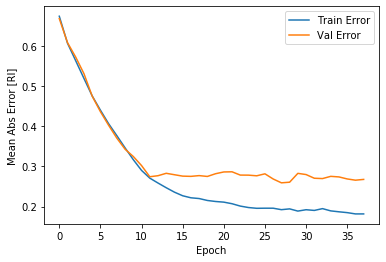

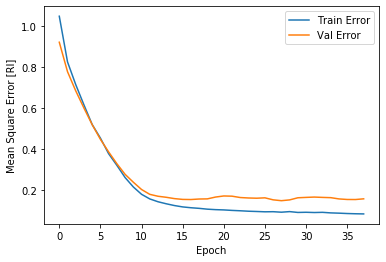

In [15]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_std, y_train_std, epochs = 1000, validation_split = 0.2, verbose = 0, callbacks = [early_stop])

plot_history(history)

### Use the early stopping model when the validation loss is smaller, and check the performance

In [16]:
# Use all data
X_train, y_train = X, y

X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
y_train_std = (y_train - y_train.mean(axis=0)) / y_train.std(axis=0)
y_test_mean = np.squeeze(y.mean(axis=0))
y_test_stdv = np.squeeze(y.std(axis=0))

model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train_std, y_train_std, epochs = 1000, validation_split = 0.2, verbose = 0, callbacks = [early_stop])

y_pred = model.predict(X_train_std)
y_pred_reverse = y_pred * y_test_stdv + y_test_mean

R2 =   0.9051


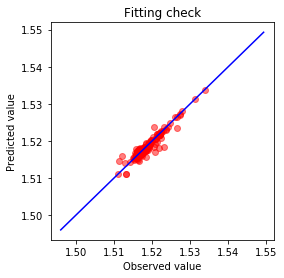

In [17]:
print('R2 = ', ' {:.4}'.format(r2_score(y, y_pred_reverse)))

plt.figure(figsize = [4, 4])
slp_1_begin = 0.99 * y.min()
slp_1_end   = 1.01 * y.max()

plt.scatter(y, y_pred_reverse, c = 'r', alpha = 0.5)
plt.plot([slp_1_begin, slp_1_end], [slp_1_begin, slp_1_end], c = 'b')
plt.title('Fitting check')
plt.xlabel('Observed value')
plt.ylabel('Predicted value')
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import (KFold, ShuffleSplit)
split_num = 5

cv_KF = KFold(n_splits = split_num, shuffle = True, random_state = 0)

print('Check best model perfromance in the folds')
for train_index, test_index in cv_KF.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    
    X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    y_train_std = (y_train - y_train.mean(axis=0)) / y_train.std(axis=0)
    X_test_std = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
    y_test_std = (y_test - y_test.mean(axis=0)) / y_test.std(axis=0)
    
    y_test_mean = np.squeeze(y_test.mean(axis=0))
    y_test_stdv = np.squeeze(y_test.std(axis=0))
    
    y_pred = model.predict(X_test_std)
    
    y_pred_reverse = y_pred * y_test_stdv + y_test_mean
    
    R2_reg = r2_score(y_test, y_pred_reverse)
    print(' {:.4}'.format(R2_reg))

Check best model perfromance in the folds
 0.9283
 0.9013
 0.721
 0.8325
 0.9046


### Save and load model

In [19]:
# Save model as .h5 format
model.save('my_model_nn.h5') 

In [20]:
# Load model
new_model = tf.keras.models.load_model('my_model_nn.h5')
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Test the model loaded
X_train, y_train = X, y

X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
y_train_std = (y_train - y_train.mean(axis=0)) / y_train.std(axis=0)
y_test_mean = np.squeeze(y.mean(axis=0))
y_test_stdv = np.squeeze(y.std(axis=0))

y_pred = new_model.predict(X_train_std)
y_pred_reverse = y_pred * y_test_stdv + y_test_mean

print('R2 = ', ' {:.4}'.format(r2_score(y, y_pred_reverse)))

R2 =   0.9051
